# Exploração de dados

Neste notebook, está contido todo o processo de exploração de dados usados para o desenvolvimento da Wonder Crypto.

In [12]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [40]:
ticker_symbol = "BTC-USD"

ticker_object = yf.Ticker(ticker_symbol)

btc_values = ticker_object.history(period="1y").drop(columns=['Dividends', 'Stock Splits'])

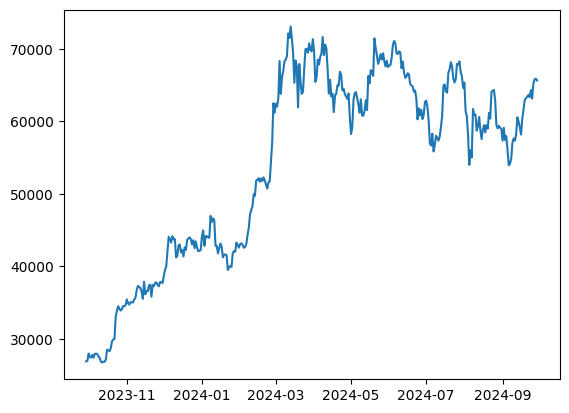

In [54]:
plt.show(plt.plot(btc_values['Close']))

In [56]:
adfuller(btc_values['Close'])

(np.float64(-1.871542994841524),
 np.float64(0.3455642889360323),
 1,
 365,
 {'1%': np.float64(-3.4483935212959844),
  '5%': np.float64(-2.8694912343676497),
  '10%': np.float64(-2.571005879151811)},
 np.float64(6128.014514761927))

In [43]:
adftest = adfuller(btc_values['Close'], autolag='AIC', regression='ct')
print("ADF Test Results")
print("Null Hypothesis: The series is non-stationary")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, the series is stationary")

ADF Test Results
Null Hypothesis: The series is non-stationary
ADF-Statistic: -1.755170936971975
P-Value: 0.7259625334236812
Number of lags: 1
Number of observations: 365
Critical Values: {'1%': np.float64(-3.983789155923777), '5%': np.float64(-3.422587251359195), '10%': np.float64(-3.1341637572908128)}
Note: If P-Value is smaller than 0.05, the series is stationary


In [44]:
btc_values['close_log_values'] = np.log(btc_values['Close'])

btc_values['close_diff_values'] = btc_values['close_log_values'].diff()

btc_values['close_growth_values'] = btc_values['close_diff_values'] * 100

btc_values.head()

,Open,High,Low,Close,Volume,close_log_values,close_diff_values,close_growth_values
Date,,,,,,,,
2023-09-29 00:00:00+00:00,27024.841797,27225.937500,26721.763672,26911.720703,10396435377,10.200317,NaN,NaN
2023-09-30 00:00:00+00:00,26911.689453,27091.794922,26888.968750,26967.916016,5331172801,10.202403,0.002086,0.208596
2023-10-01 00:00:00+00:00,26967.396484,28047.238281,26965.093750,27983.750000,9503917434,10.239379,0.036976,3.697612
2023-10-02 00:00:00+00:00,27976.798828,28494.458984,27347.787109,27530.785156,19793041322,10.223060,-0.016319,-1.631915
2023-10-03 00:00:00+00:00,27508.251953,27667.191406,27216.001953,27429.978516,11407814187,10.219392,-0.003668,-0.366832


In [50]:
adftest = adfuller(btc_values['close_diff_values'].dropna(), autolag='AIC', regression='ct')
print("ADF Test Results")
print("Null Hypothesis: The series is non-stationary")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, the series is stationary")

ADF Test Results
Null Hypothesis: The series is non-stationary
ADF-Statistic: -21.066384254311362
P-Value: 0.0
Number of lags: 0
Number of observations: 365
Critical Values: {'1%': np.float64(-3.983789155923777), '5%': np.float64(-3.422587251359195), '10%': np.float64(-3.1341637572908128)}
Note: If P-Value is smaller than 0.05, the series is stationary


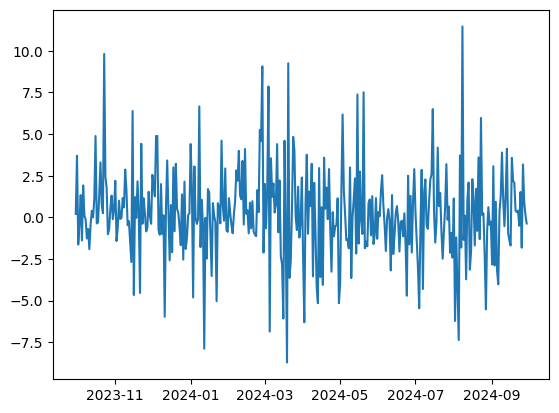

In [52]:
plt.show(plt.plot(btc_values['close_growth_values']))